In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv(r'Irish_DataSet\finalDataForResidential.txt',header=None,delimiter=" ")
df.rename(columns={0: "ID", 1: "Date", 2: "Time", 3: "Consumption"},inplace=True)
def convert_date(day):
    base_date = datetime(2009, 1, 1)
    converted_date = base_date + timedelta(days=(day - 195))
    return converted_date

def convert_time(time):
    hours = (time - 1) // 2
    minutes = (time - 1) % 2 * 30
    return f"{(hours):02d}:{(minutes):02d}"

df

,ID,Date,Time,Consumption
0,1002,195,1,0.362
1,1002,195,2,0.064
2,1002,195,3,0.119
3,1002,195,4,0.023
4,1002,195,5,0.140
...,...,...,...,...
5873845,1998,365,46,1.242
5873846,1998,365,47,2.724
5873847,1998,365,48,1.853
5873848,1998,365,49,0.000


In [30]:
## Don't run code from onwards till plot

In [3]:
df['New_Date'] = df['Date'].apply(lambda x: convert_date(x).date())

In [4]:
df['New_Time'] = df['Time'].apply(convert_time)

In [12]:
df['New_Time'] = df['New_Time'].str.replace('24:00', '00:00')
df['New_Date'] = pd.to_datetime(df['New_Date'])
df['New_Time'] = pd.to_timedelta(df['New_Time'] + ':00')
df['Datetime'] = df['New_Date'] + df['New_Time']


In [14]:
df.head()

,ID,Date,Time,Consumption,New_Date,New_Time,Datetime
0,1002,195,1,0.362,2009-01-01,0 days 00:00:00,2009-01-01 00:00:00
1,1002,195,2,0.064,2009-01-01,0 days 00:30:00,2009-01-01 00:30:00
2,1002,195,3,0.119,2009-01-01,0 days 01:00:00,2009-01-01 01:00:00
3,1002,195,4,0.023,2009-01-01,0 days 01:30:00,2009-01-01 01:30:00
4,1002,195,5,0.140,2009-01-01,0 days 02:00:00,2009-01-01 02:00:00


In [18]:
df.set_index(df['Datetime'],inplace=True)

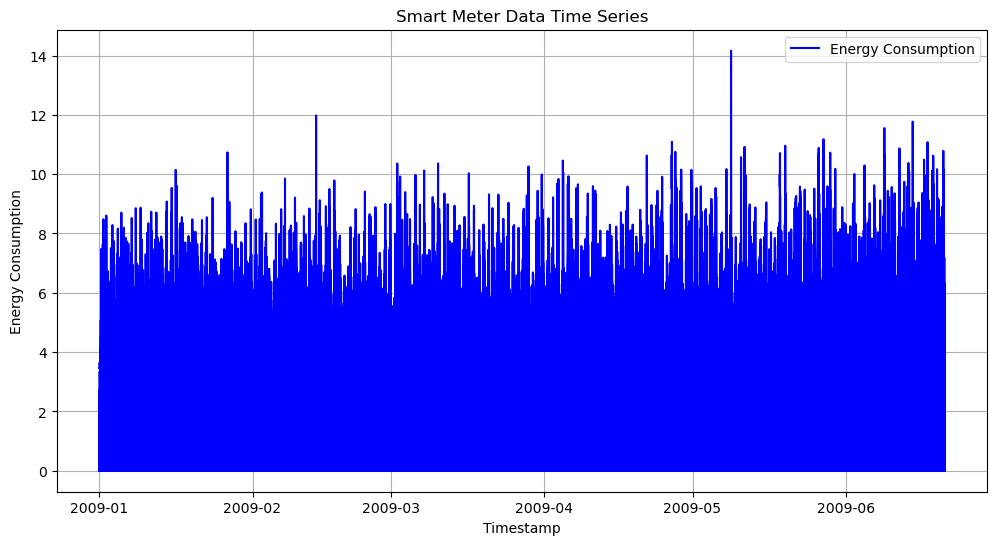

In [19]:
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(df.index, df['Consumption'], label='Energy Consumption', color='blue')
plt.title('Smart Meter Data Time Series')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
!pip install vaex

     ---------------------------------------- 2.0/2.0 MB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 43.2/43.2 kB ? eta 0:00:00
     ---------------------------------------- 58.2/58.2 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 207.8/207.8 kB 4.2 MB/s eta 0:00:00
     -------------------------------------- 374.5/374.5 kB 5.8 MB/s eta 0:00:00
     -------------------------------------- 24.3/24.3 MB 199.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 239.7/239.7 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 259.6 kB/s eta 0:00:00
     -------------------------------------- 11.7/11.7 MB 704.6 kB/s eta 0:00:00
     ------------------------------------ 511.6/511.6 kB 486.3 kB/s eta 0:00:00
     ------------------------

In [41]:
df.isnull().sum()

ID             0
Date           0
Time           0
Consumption    0
dtype: int64

## Standardizing the data

In [4]:
scaler = StandardScaler()

X_std = scaler.fit_transform(df[['Consumption']].values)
X_std

array([[-0.18931034],
       [-0.61850494],
       [-0.53929118],
       ...,
       [ 1.95810291],
       [-0.71068097],
       [-0.71068097]])

## find K using Elblow method 

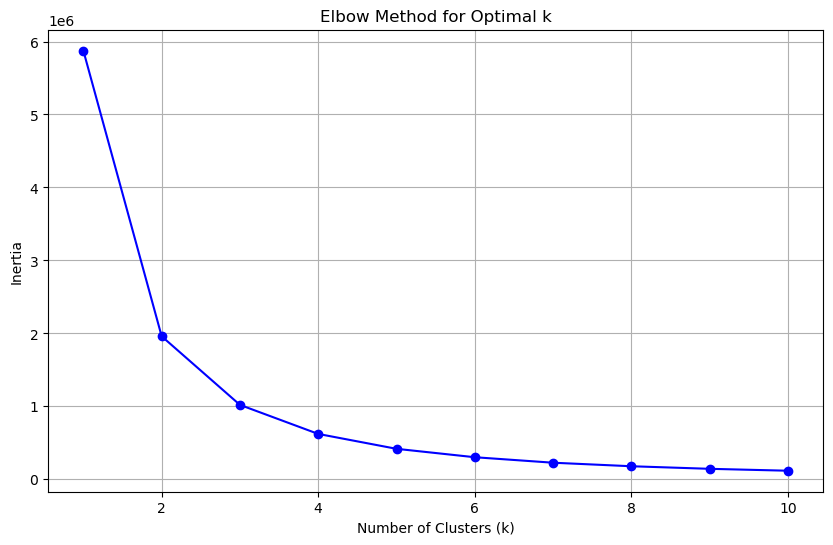

In [44]:
X = df[['Consumption']].values
# sample_size = 5873850  #1000000
# sampled_data = shuffle(df, random_state=42)[:sample_size]

inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

## K-means clustering

In [52]:
##without train and test 
k=4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10,max_iter=100)
kmeans.fit(X_std)

KMeans(max_iter=100, n_clusters=4, n_init=10, random_state=42)

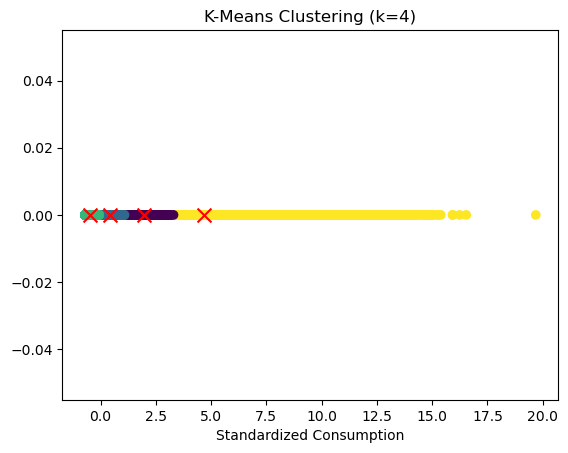

In [53]:
plt.scatter(X_std[:,], [0] * len(X_std), c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,], [0] * len(kmeans.cluster_centers_), c='red', marker='x', s=100)
plt.xlabel('Standardized Consumption')
plt.title(f'K-Means Clustering (k={k})')
plt.show()

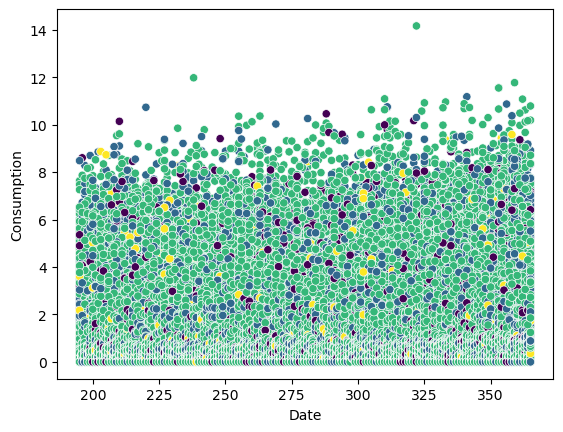

In [56]:
cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels

sns.scatterplot(data=df, x='Date', y='Consumption', hue='Cluster', palette='viridis', legend=False)
plt.show()

# print("Length of cluster_labels:", len(cluster_labels))

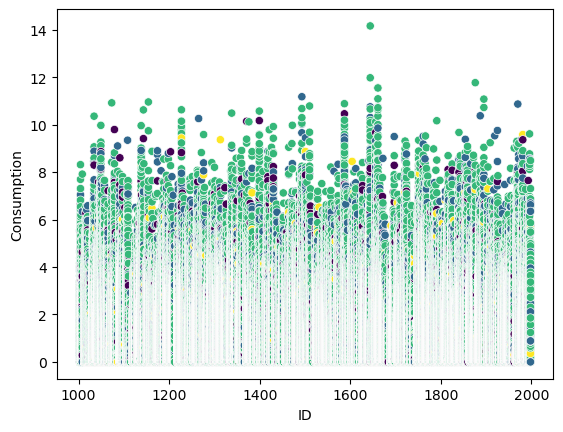

In [65]:
sns.scatterplot(data=df, x='ID', y='Consumption', hue='Cluster', palette='viridis', legend=False)
plt.show()

In [73]:
df['Consumption'].max()

14.162

## Training and Testing dataset 

In [7]:
X = df.drop('Consumption', axis=1)  # Features
y = df['Consumption']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4699080, 3), (1174770, 3), (4699080,), (1174770,))

## Standardize the features:

In [14]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## Elblow method

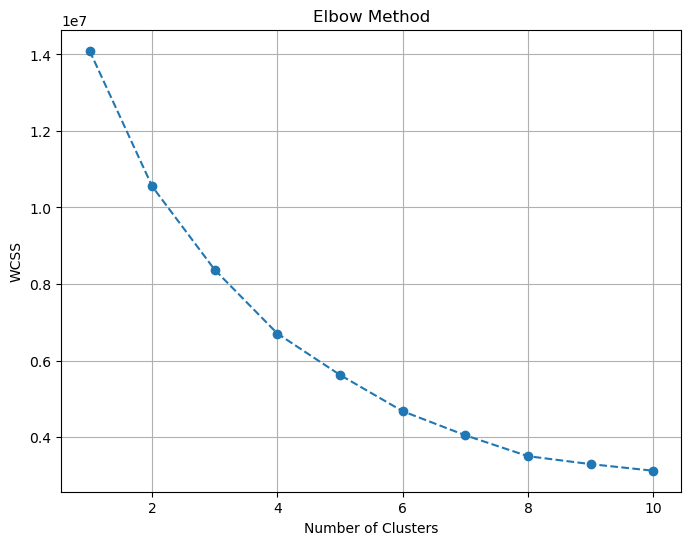

In [15]:
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train_std)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

## Train K-means clustering model with the chosen number of clusters

In [34]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_train_std)

# Predict clusters for the test data
y_pred = kmeans.predict(X_test_std)

## Evaluate the accuracy of the K-means clustering model:

In [39]:
silhouette_avg = silhouette_score(X_test_std, y_pred)

# cluster_labels = kmeans.labels_
# silhouette_avg = silhouette_score(X_train_std, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

#A higher silhouette score indicates better clustering

In [37]:
inertia = kmeans.inertia_
print(f'Inertia (within-cluster sum of squares): {inertia:.2f}')

Inertia (within-cluster sum of squares): 5621774.76
